# SNA Group Assignment

Importing Libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Importing dataset

In [2]:
users = pd.read_csv('musae_git_target.csv')

Reading Graphs

In [3]:
Data = open('musae_git_edges.csv', "r")

next(Data, None)  # skip the first line in the input file

followers = nx.parse_edgelist(Data, delimiter=',', create_using=nx.Graph(), nodetype=int)

Finding Local Cluster (each nodes clustering coefficient)

In [10]:
local_cluster = nx.clustering(followers)
sorted_local_cluster = {k: v for k, v in sorted(local_cluster.items(), key=lambda item: item[1])}
sorted_local_cluster

{0: 0,
 34526: 0,
 34035: 0,
 6067: 0,
 20183: 0,
 3: 0,
 4950: 0,
 4: 0,
 2865: 0,
 5: 0,
 22674: 0,
 29465: 0,
 30833: 0,
 17: 0,
 36632: 0,
 291: 0,
 21498: 0,
 327: 0,
 27954: 0,
 25948: 0,
 1268: 0,
 28: 0,
 13003: 0,
 32: 0,
 34: 0,
 27804: 0,
 25218: 0,
 1524: 0,
 9804: 0,
 32139: 0,
 24921: 0,
 37463: 0,
 24033: 0,
 14266: 0,
 5338: 0,
 9349: 0,
 6185: 0,
 27718: 0,
 8608: 0,
 44: 0,
 45: 0,
 12703: 0,
 30789: 0,
 9946: 0,
 33324: 0,
 33602: 0,
 48: 0,
 26597: 0,
 7121: 0,
 30074: 0,
 22212: 0,
 54: 0,
 36103: 0,
 5568: 0,
 57: 0,
 59: 0,
 60: 0,
 37077: 0,
 62: 0,
 63: 0,
 29946: 0,
 64: 0,
 29440: 0,
 26706: 0,
 70: 0,
 6078: 0,
 2819: 0,
 5880: 0,
 23139: 0,
 77: 0,
 79: 0,
 82: 0,
 25858: 0,
 8828: 0,
 5858: 0,
 84: 0,
 18373: 0,
 33824: 0,
 90: 0,
 21351: 0,
 15808: 0,
 91: 0,
 23110: 0,
 1337: 0,
 21912: 0,
 13576: 0,
 21993: 0,
 93: 0,
 13506: 0,
 95: 0,
 6081: 0,
 18835: 0,
 14459: 0,
 23519: 0,
 6082: 0,
 6114: 0,
 34423: 0,
 21537: 0,
 7183: 0,
 32897: 0,
 102: 0,
 20

Global Clustering with count zeroes (default)

In [56]:
global_cluster = nx.average_clustering(followers, count_zeros=True)
global_cluster

0.16753704480107323

eccentricity (shortest path with maximum number of nodes)

In [69]:
# import pickle
# with open('eccentricity.pkl', 'rb') as f:
#     eccentricity = pickle.load(f)

eccentricity = nx.eccentricity(followers)
sorted_eccentricity = {k: v for k, v in sorted(eccentricity.items(), key=lambda item: item[1])}

sorted_eccentricity = list(dict(sorted(eccentricity.items(), key=lambda item: item[1], reverse=True)).items())

# get index (node number) and value (node eccentricity value) top 10 after sorting
sorted_eccentricity_indexes = [x[0] for x in sorted_eccentricity]
sorted_eccentricity_values = [x[1] for x in sorted_eccentricity]

# Creating dataframe
top_sorted_eccentricity = pd.DataFrame({'Name':users.iloc[sorted_eccentricity_indexes].name.tolist(), 
                                      'Eccentricity': sorted_eccentricity_values, 
                                      'ml_target':users.iloc[sorted_eccentricity_indexes].ml_target.tolist()})

top_sorted_eccentricity.groupby('Eccentricity').count()['ml_target'].sort_values(ascending=False)
# top_sorted_eccentricity

Eccentricity
7     27399
8      8677
6      1113
9       480
10       27
11        4
Name: ml_target, dtype: int64

Radius of Followers Graph

In [16]:
radius_of_graph = nx.radius(followers)
radius_of_graph

6


Diameter of Followers Graph

In [17]:
diameter_of_graph = nx.diameter(followers)
diameter_of_graph

11


For verification diameter=maximum eccentricity

Density of follower

In [ ]:
density_of_graph = nx.density(followers)
density_of_graph

0.0004066878203117068

Degree Distribution upto degree value 50 

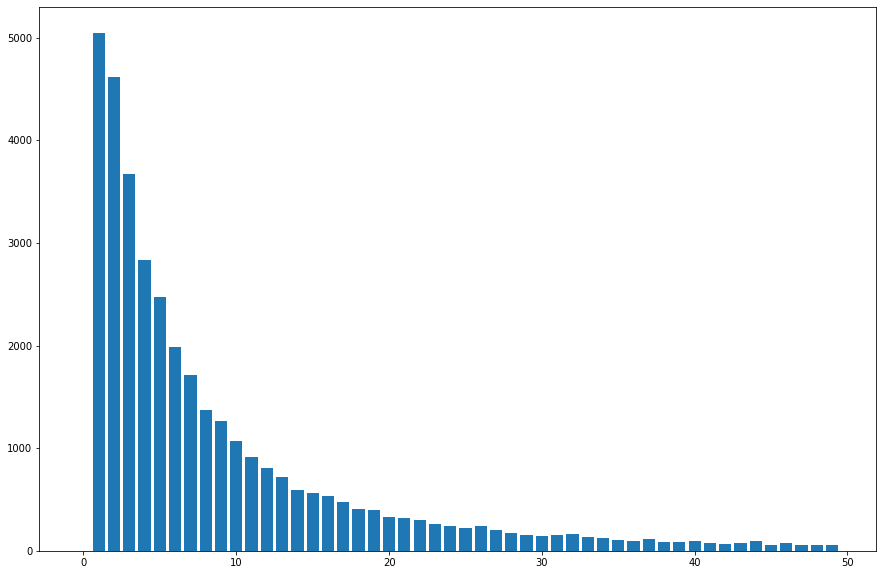

In [9]:
degree_distrubution = nx.degree_histogram(followers)
fig = plt.figure(figsize=(15, 10))
x = [i for i in range(0, 50)]
plt.bar(x, degree_distrubution[0:50])
plt.show()

Connected Components

In [ ]:
print(nx.is_connected(followers))
print(nx.number_connected_components(followers))

True
1


Average Path Length

In [ ]:
average_short_path_length = nx.average_shortest_path_length(followers)
average_short_path_length

3.2464090056353823

_______________

In [41]:
# Creating dataframe
single_value_calc = pd.DataFrame({'Radius': [radius_of_graph], 'Diameter': [diameter_of_graph], 'Density':[density_of_graph], 
                                  'Connected Component': [nx.number_connected_components(followers)],
                                  'Average Path Length': [average_short_path_length]})

# single_value_calc = pd.DataFrame({'Radius': [6], 'Diameter': [11],  'Density': [0.0004066878203117068], 
#                                   'Connected Component': [1], 'Average Path Length': [3.2464090056353823]})

single_value_calc.rename(index={0:'Overall Graph Measures'})

,Radius,Diameter,Density,Connected Component,Average Path Length
Overall Graph Measures,6,11,0.000407,1,3.246409


In [66]:
local_clustering_sort = list((k,v) for k, v in sorted(local_cluster.items(), key=lambda item: item[0], reverse=True))
eccentricity_sort = list((k,v)for k, v in sorted(eccentricity.items(), key=lambda item: item[0], reverse=True))

# get index (node number) and value (node centrality value) top 10 after sorting
sorted_indexes = [x[0] for x in local_clustering_sort]
local_values_sort = [x[1] for x in local_clustering_sort]
eccentricity_values_sort = [x[1] for x in eccentricity_sort]

# Creating dataframe
eccentricity_and_local_cluster = pd.DataFrame({'Name':users.iloc[sorted_indexes].name.tolist(), 
                                      'Eccentricity': eccentricity_values_sort, 
                                      'Local Clustering': local_values_sort})

eccentricity_and_local_cluster

,Name,Eccentricity,Local Clustering
0,caseycavanagh,7,0.333333
1,Injabie3,8,0.000000
2,qpautrat,7,0.000000
3,kris-ipeh,7,0.000000
4,shawnwanderson,8,0.000000
...,...,...,...
37695,sunilangadi2,8,0.000000
37696,SuhwanCha,7,0.000000
37697,JpMCarrilho,8,0.000000
37698,shawflying,8,0.178571


___________

### Centrality Measures

Degree Centrality

In [5]:
# Applying degree centrality in NetworX
deg_centrality = nx.degree_centrality(followers)

# Applying degree centrality in NetworX
deg_centrality = nx.degree_centrality(followers)
# Sorting degree centrality and getting top 10
sorted_deg_centrality = list(dict(sorted(deg_centrality.items(), key=lambda item: item[1], reverse=True)).items())

# get index (node number) and value (node centrality value) top 10 after sorting
sorted_deg_centrality_indexes = [x[0] for x in sorted_deg_centrality]
sorted_deg_centrality_values = [x[1] for x in sorted_deg_centrality]

# Creating dataframe
top_degree_centrality = pd.DataFrame({'Name':users.iloc[sorted_deg_centrality_indexes].name.tolist(), 
                                      'Degree Centrality': sorted_deg_centrality_values, 
                                      'ml_target':users.iloc[sorted_deg_centrality_indexes].ml_target.tolist()})

top_degree_centrality

,Name,Degree Centrality,ml_target
0,dalinhuang99,0.250882,0
1,nfultz,0.187936,0
2,addyosmani,0.088172,0
3,Bunlong,0.078464,0
4,gabrielpconceicao,0.065466,0
...,...,...,...
37695,chrisryancarter,0.000027,0
37696,kcakdemir,0.000027,1
37697,chadmazilly,0.000027,0
37698,orionblastar,0.000027,1


Closeness Centrality

In [7]:
# Loading save json of closeness centrality output
# import pickle
# with open('closness_centrality.pkl', 'rb') as f:
#     closeness_centrality = pickle.load(f)

# Applying closeness centrality in NetworX
closeness_centrality = nx.closeness_centrality(followers)


# Sorting degree centrality and getting top 10
sorted_closness_centrality = list(dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)).items())

# get index (node number) and value (node centrality value) top 10 after sorting
sorted_closeness_centrality_indexes = [x[0] for x in sorted_closness_centrality]
sorted_closeness_centrality_values = [x[1] for x in sorted_closness_centrality]

# Creating dataframe
top_closeness_centrality = pd.DataFrame({'Name':users.iloc[sorted_closeness_centrality_indexes].name.tolist(), 
                                      'Closeness Centrality': sorted_closeness_centrality_values, 
                                      'ml_target':users.iloc[sorted_closeness_centrality_indexes].ml_target.tolist()})

top_closeness_centrality

,Name,Closeness Centrality,ml_target
0,nfultz,0.523081,0
1,dalinhuang99,0.517787,0
2,Bunlong,0.466324,0
3,addyosmani,0.450342,0
4,gabrielpconceicao,0.447461,0
...,...,...,...
37695,haochenli,0.155371,0
37696,abhishekpopli,0.153934,1
37697,scandeiro,0.147439,0
37698,jazzchipc,0.145151,0


Betweenness Centrality

In [8]:
# Loading save json of closeness centrality output
# import pickle
# with open('betweeness_centrality.pkl', 'rb') as f:
#     betweeness_centrality = pickle.load(f)

# Applying betweeness centrality in NetworX
betweeness_centrality = nx.betweenness_centrality(followers)

# Sorting degree centrality and getting top 10
sorted_between_centrality = list(dict(sorted(betweeness_centrality.items(), key=lambda item: item[1], reverse=True)).items())

# get index (node number) and value (node centrality value) top 10 after sorting
sorted_between_centrality_indexes = [x[0] for x in sorted_between_centrality]
sorted_between_centrality_values = [x[1] for x in sorted_between_centrality]

# Creating dataframe
top_between_centrality = pd.DataFrame({'Name':users.iloc[sorted_between_centrality_indexes].name.tolist(), 
                                      'Betweeness Centrality': sorted_between_centrality_values, 
                                      'ml_target':users.iloc[sorted_between_centrality_indexes].ml_target.tolist()})

top_between_centrality

,Name,Betweeness Centrality,ml_target
0,dalinhuang99,0.269599,0
1,nfultz,0.240541,0
2,Bunlong,0.055323,0
3,addyosmani,0.043408,0
4,gabrielpconceicao,0.035337,0
...,...,...,...
37695,chrisryancarter,0.000000,0
37696,kcakdemir,0.000000,1
37697,chadmazilly,0.000000,0
37698,orionblastar,0.000000,1


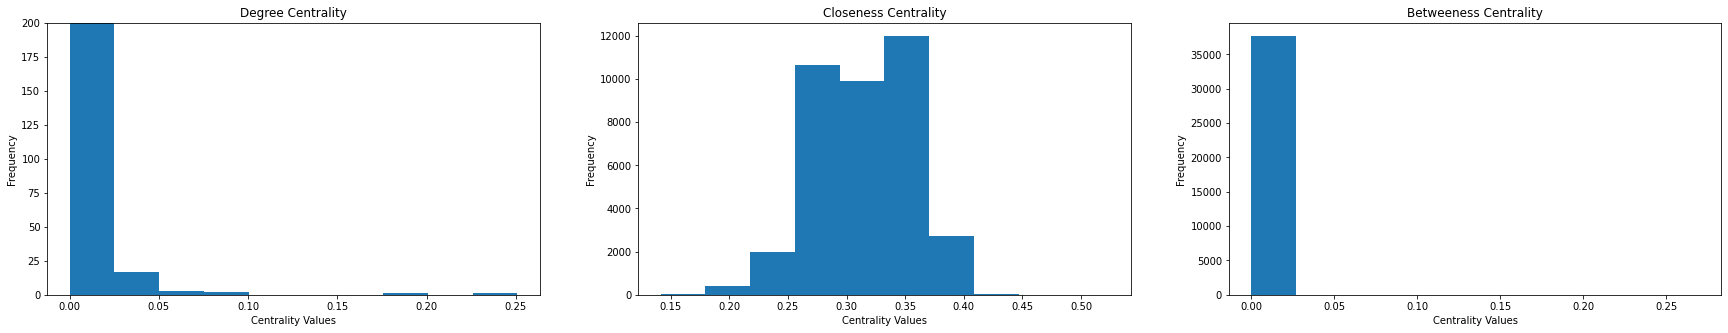

In [13]:
plt.subplot(1,3,1)
plt.xlabel('Centrality Values')
plt.title('Degree Centrality')

top_degree_centrality['Degree Centrality'].plot.hist(figsize=(30, 5), ylim=(0,200))
plt.subplot(1,3,2)
plt.xlabel('Centrality Values')
plt.title('Closeness Centrality')

top_closeness_centrality['Closeness Centrality'].plot.hist(figsize=(30, 5))

plt.subplot(1,3,3)
plt.xlabel('Centrality Values')
plt.title('Betweeness Centrality')

top_between_centrality['Betweeness Centrality'].plot.hist(figsize=(30, 5))

plt.show()


Visualizing Highest Degree Centrality Node in Graph

Highest Degree Centrality Node Lies in Red Shaded Region


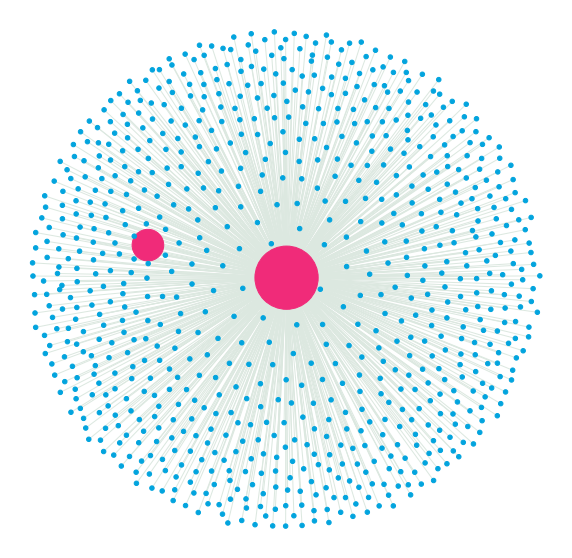

In [143]:
followers_network = pd.read_csv('musae_git_edges.csv')
users = pd.read_csv('musae_git_target.csv')

nodes_with_deg_gret_100 = dict((k, v) for k, v in dict(followers.degree).items() if v > 50)

# Creating a function to check if id_1 or id_2 is ML or Web developer
def check_if_exist(id):
    if id in list(nodes_with_deg_gret_100.keys()):
        return 1
    else:
        return 0

followers_network['first_id'] = followers_network['id_1'].apply(check_if_exist)
# followers_network['second_id'] = followers_network['id_2'].apply(check_if_exist)
followers_test = followers_network[(followers_network['first_id'] == 1) & (followers_network['id_2'] == 31890)]
G = nx.from_pandas_edgelist(followers_test, 'id_1', 'id_2')

# Visualizing the highest degree centrality node regin in Graph
fig = plt.figure(figsize=(10, 10))
plt.margins(0,0)

nodes_sizes = []
nodes_color = []

for each in list(G.nodes):
    if each == sorted_deg_centrality[0][0]:
        nodes_sizes.append(4000)
        nodes_color.append('#f02b79')

    elif each == sorted_deg_centrality[1][0]:
        nodes_sizes.append(1000)
        nodes_color.append('#f02b79')
    else:
        nodes_sizes.append(20)
        nodes_color.append('#02A4DE')

print('Highest Degree Centrality Node Lies in Red Shaded Region')
nx.draw(G, node_size=nodes_sizes, node_color=nodes_color, edge_color='#dce8e0')

Visualizing Two Highest Closeness Centrality Node in Graph

Highest Closeness Centrality Node Lies in Red Shaded Region


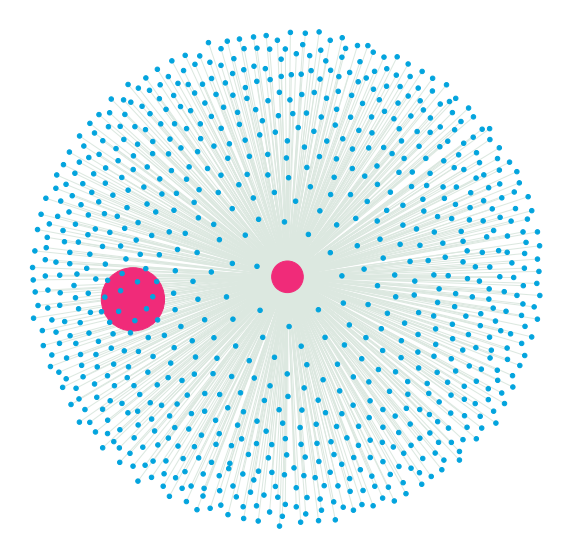

In [144]:
followers_network = pd.read_csv('musae_git_edges.csv')
users = pd.read_csv('musae_git_target.csv')

nodes_with_deg_gret_100 = dict((k, v) for k, v in dict(followers.degree).items() if v > 50)

# Creating a function to check if id_1 or id_2 is ML or Web developer
def check_if_exist(id):
    if id in list(nodes_with_deg_gret_100.keys()):
        return 1
    else:
        return 0

followers_network['first_id'] = followers_network['id_1'].apply(check_if_exist)
# followers_network['second_id'] = followers_network['id_2'].apply(check_if_exist)
followers_test = followers_network[(followers_network['first_id'] == 1) & (followers_network['id_2'] == 31890)]
G = nx.from_pandas_edgelist(followers_test, 'id_1', 'id_2')

# Visualizing the highest degree centrality node regin in Graph
fig = plt.figure(figsize=(10, 10))
plt.margins(0,0)

nodes_sizes = []
nodes_color = []

for each in list(G.nodes):
    if each == sorted_closness_centrality[0][0]:
        nodes_sizes.append(4000)
        nodes_color.append('#f02b79')

    elif each == sorted_closness_centrality[1][0]:
        nodes_sizes.append(1000)
        nodes_color.append('#f02b79')
    else:
        nodes_sizes.append(20)
        nodes_color.append('#02A4DE')


print('Highest Closeness Centrality Node Lies in Red Shaded Region')
nx.draw(G, node_size=nodes_sizes, node_color=nodes_color, edge_color='#dce8e0')

Visualizing Two Betwenness Closeness Centrality Node in Graph

Highest Betweenness Centrality Node Lies in Red Shaded Region


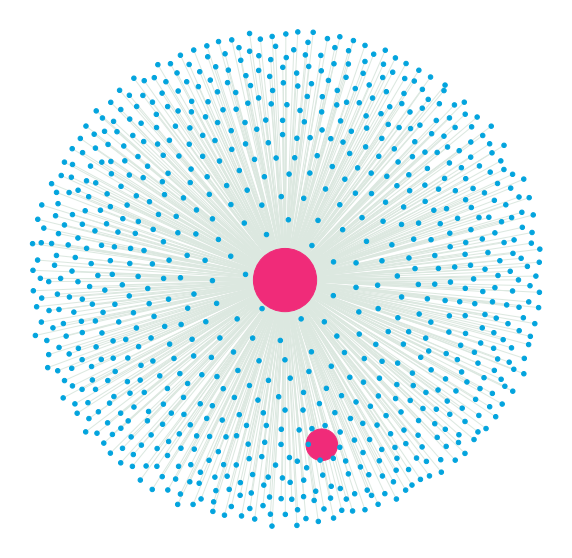

In [145]:
followers_network = pd.read_csv('musae_git_edges.csv')
users = pd.read_csv('musae_git_target.csv')

nodes_with_deg_gret_100 = dict((k, v) for k, v in dict(followers.degree).items() if v > 50)

# Creating a function to check if id_1 or id_2 is ML or Web developer
def check_if_exist(id):
    if id in list(nodes_with_deg_gret_100.keys()):
        return 1
    else:
        return 0

followers_network['first_id'] = followers_network['id_1'].apply(check_if_exist)
# followers_network['second_id'] = followers_network['id_2'].apply(check_if_exist)
followers_test = followers_network[(followers_network['first_id'] == 1) & (followers_network['id_2'] == 31890)]
G = nx.from_pandas_edgelist(followers_test, 'id_1', 'id_2')

# Visualizing the highest degree centrality node regin in Graph
fig = plt.figure(figsize=(10, 10))
plt.margins(0,0)

nodes_sizes = []
nodes_color = []

for each in list(G.nodes):
    if each == sorted_between_centrality[0][0]:
        nodes_sizes.append(4000)
        nodes_color.append('#f02b79')

    elif each == sorted_between_centrality[1][0]:
        nodes_sizes.append(1000)
        nodes_color.append('#f02b79')
    else:
        nodes_sizes.append(20)
        nodes_color.append('#02A4DE')


print('Highest Betweenness Centrality Node Lies in Red Shaded Region')
nx.draw(G, node_size=nodes_sizes, node_color=nodes_color, edge_color='#dce8e0')